In [133]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error
import matplotlib.pyplot as plt   



ClassicalRegister(2, 'classical_syndrom')


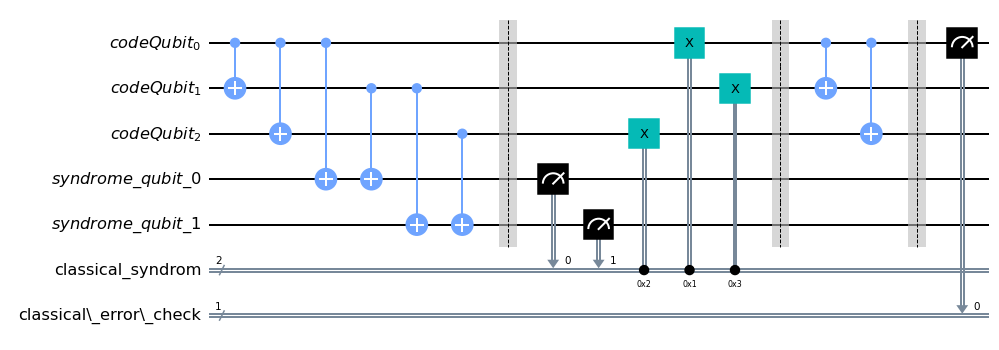

In [134]:
cq = QuantumRegister(3, 'codeQubit')

lq = QuantumRegister(2,'syndrome_qubit')
c_2 = ClassicalRegister(2, 'classical_syndrom')
c = ClassicalRegister(1, 'classical_error_check')

qc = QuantumCircuit(cq,lq,c_2,c)

#encoding 
qc.cx(cq[0], cq[1])
qc.cx(cq[0], cq[2])

qc.cx(cq[0],lq[0])
qc.cx(cq[1],lq[0])
qc.cx(cq[1],lq[1])
qc.cx(cq[2],lq[1])

qc.barrier()

#Intermediate Measure
qc.measure(lq, c_2)

# run the circuit with the noise model and extract the counts

#recovering 
print(c_2)

qc.x(cq[2]).c_if(c_2, 2)
qc.x(cq[0]).c_if(c_2, 1)
qc.x(cq[1]).c_if(c_2, 3)
qc.barrier()


#decoding
qc.cx(cq[0], cq[1])
qc.cx(cq[0], cq[2])


qc.barrier()

qc.measure(cq[0],c)



  
qc.draw(output='mpl')






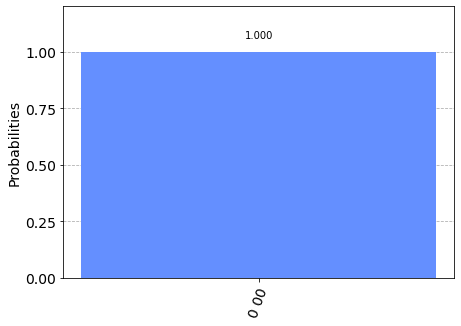

In [135]:
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
counts = aer_sim.run(qobj).result().get_counts()
plot_histogram(counts)

ClassicalRegister(2, 'classical_syndrom')


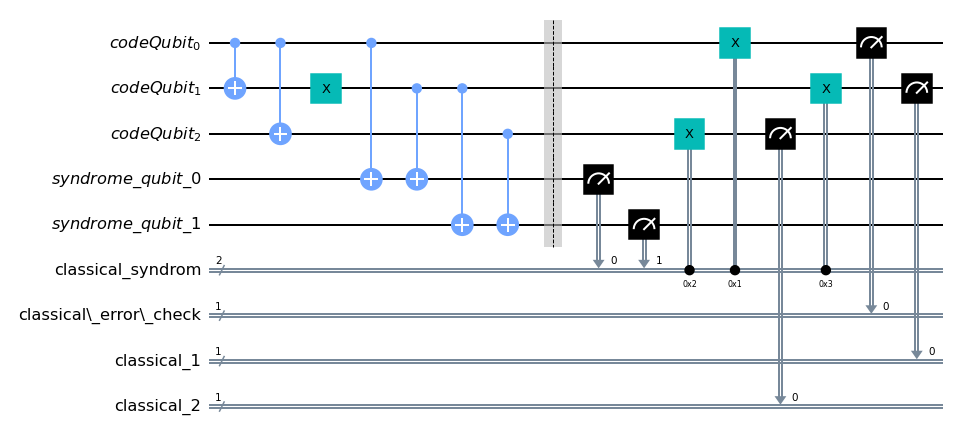

In [158]:
cq = QuantumRegister(3, 'codeQubit')

lq = QuantumRegister(2,'syndrome_qubit')
c_2 = ClassicalRegister(2, 'classical_syndrom')
c = ClassicalRegister(1, 'classical_error_check')
c1 = ClassicalRegister(1, 'classical_1')
c2 = ClassicalRegister(1, 'classical_2')


qc = QuantumCircuit(cq,lq,c_2,c,c1,c2)

#encoding 
qc.cx(cq[0], cq[1])
qc.cx(cq[0], cq[2])
qc.x(cq[1])



qc.cx(cq[0],lq[0])
qc.cx(cq[1],lq[0])
qc.cx(cq[1],lq[1])
qc.cx(cq[2],lq[1])

qc.barrier()

#Intermediate Measure
qc.measure(lq, c_2)

# run the circuit with the noise model and extract the counts

#recovering 
print(c_2)

qc.x(cq[2]).c_if(c_2, 2)
qc.x(cq[0]).c_if(c_2, 1)
qc.x(cq[1]).c_if(c_2, 3)
'''qc.barrier()


#decoding
qc.cx(cq[0], cq[1])
qc.cx(cq[0], cq[2])


qc.barrier()'''

qc.measure(cq[0],c)
qc.measure(cq[1],c1)
qc.measure(cq[2],c2)
  
qc.draw(output='mpl')


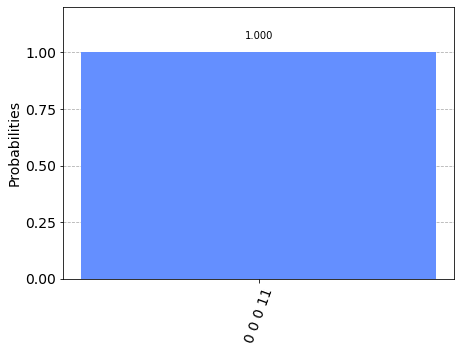

In [159]:
aer_sim = Aer.get_backend('qasm_simulator')
qobj = assemble(qc)
counts = aer_sim.run(qobj).result().get_counts()
plot_histogram(counts)

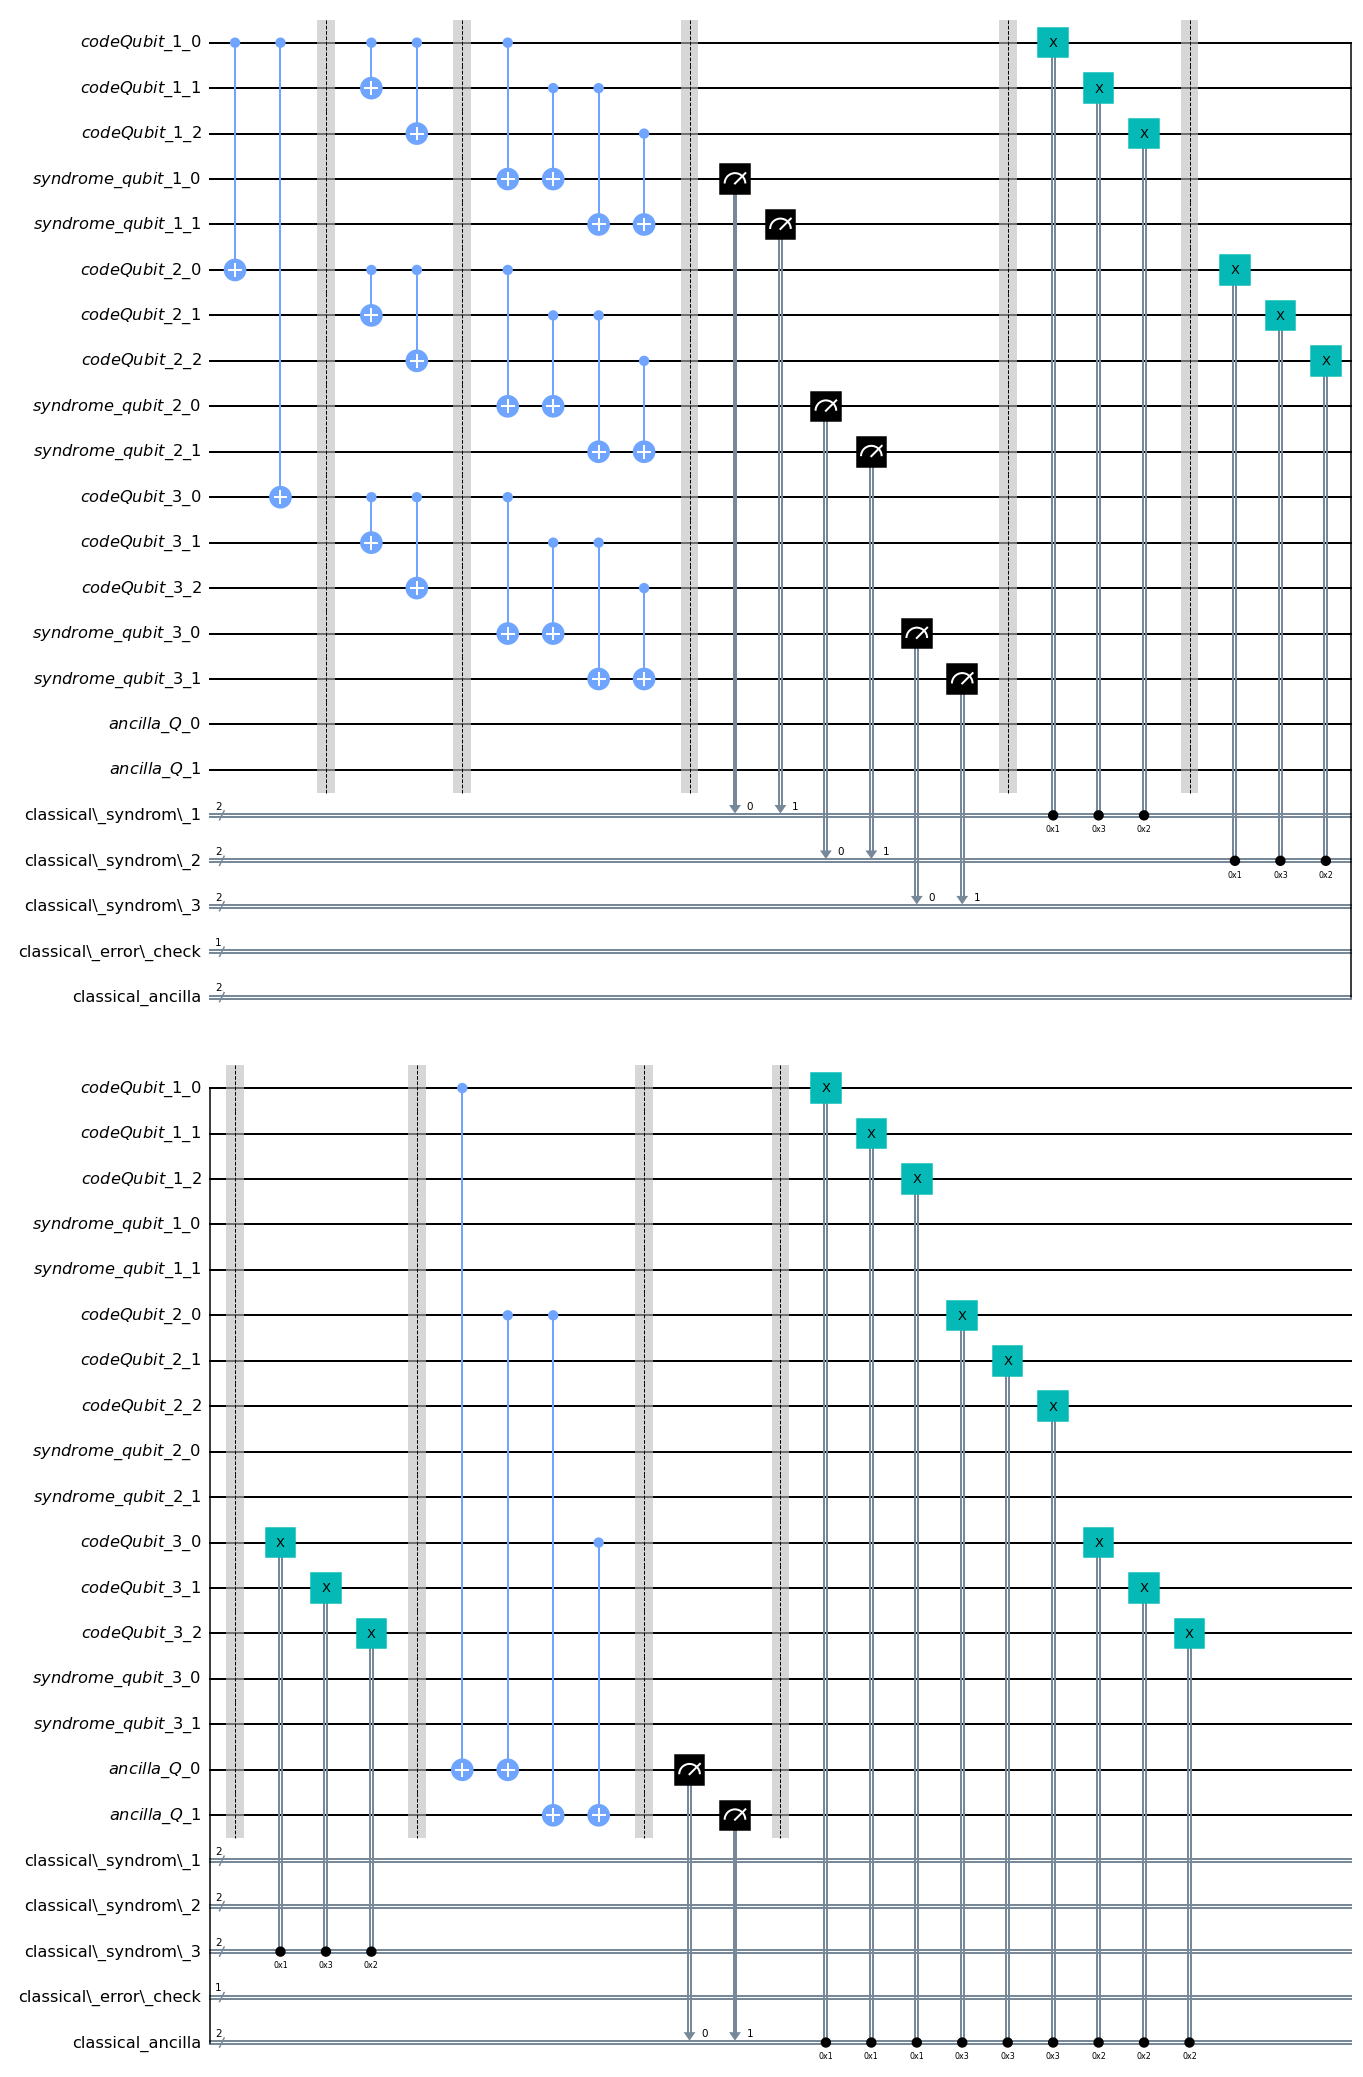

In [117]:
cq_1 = QuantumRegister(3, 'codeQubit_1')
cq_2 = QuantumRegister(3, 'codeQubit_2')
cq_3 = QuantumRegister(3, 'codeQubit_3')


lq_1 = QuantumRegister(2,'syndrome_qubit_1')
lq_2 = QuantumRegister(2,'syndrome_qubit_2')
lq_3 = QuantumRegister(2,'syndrome_qubit_3')

aq = QuantumRegister(2,'ancilla_Q')

c_1 = ClassicalRegister(2, 'classical_syndrom_1')
c_2 = ClassicalRegister(2, 'classical_syndrom_2')
c_3 = ClassicalRegister(2, 'classical_syndrom_3')


ca = ClassicalRegister(2, 'classical_ancilla')


c = ClassicalRegister(1, 'classical_error_check')

qc = QuantumCircuit(cq_1,lq_1,cq_2,lq_2,cq_3,lq_3,c_1,c_2,c_3,c,aq,ca)


#Encoding Super block
qc.cx(cq_1[0],cq_2[0])
qc.cx(cq_1[0],cq_3[0])

qc.barrier()

#Encoding small block 
qc.cx(cq_1[0],cq_1[1])
qc.cx(cq_1[0],cq_1[2])


qc.cx(cq_2[0],cq_2[1])
qc.cx(cq_2[0],cq_2[2])


qc.cx(cq_3[0],cq_3[1])
qc.cx(cq_3[0],cq_3[2])


qc.barrier()

#Syndrom Error bits
qc.cx(cq_1[0],lq_1[0])
qc.cx(cq_1[1],lq_1[0])
qc.cx(cq_1[1],lq_1[1])
qc.cx(cq_1[2],lq_1[1])


qc.cx(cq_2[0],lq_2[0])
qc.cx(cq_2[1],lq_2[0])
qc.cx(cq_2[1],lq_2[1])
qc.cx(cq_2[2],lq_2[1])


qc.cx(cq_3[0],lq_3[0])
qc.cx(cq_3[1],lq_3[0])
qc.cx(cq_3[1],lq_3[1])
qc.cx(cq_3[2],lq_3[1])

qc.barrier()

#Measure 
qc.measure(lq_1,c_1)
qc.measure(lq_2,c_2)
qc.measure(lq_3,c_3)

qc.barrier()

#Recovery majority rule 
qc.x(cq_1[0]).c_if(c_1, 1)
qc.x(cq_1[1]).c_if(c_1, 3)
qc.x(cq_1[2]).c_if(c_1, 2)
qc.barrier()

qc.x(cq_2[0]).c_if(c_2, 1)
qc.x(cq_2[1]).c_if(c_2, 3)
qc.x(cq_2[2]).c_if(c_2, 2)
qc.barrier()

qc.x(cq_3[0]).c_if(c_3, 1)
qc.x(cq_3[1]).c_if(c_3, 3)
qc.x(cq_3[2]).c_if(c_3, 2)

qc.barrier()

#Error correction 
qc.cx(cq_1[0],aq[0])
qc.cx(cq_2[0],aq[0])
qc.cx(cq_2[0],aq[1])
qc.cx(cq_3[0],aq[1])
qc.barrier()

qc.measure(aq,ca)

qc.barrier()

qc.x(cq_1[0]).c_if(ca, 1)
qc.x(cq_1[1]).c_if(ca, 1)
qc.x(cq_1[2]).c_if(ca, 1)

qc.x(cq_2[0]).c_if(ca, 3)
qc.x(cq_2[1]).c_if(ca, 3)
qc.x(cq_2[2]).c_if(ca, 3)

qc.x(cq_3[0]).c_if(ca, 2)
qc.x(cq_3[1]).c_if(ca, 2)
qc.x(cq_3[2]).c_if(ca, 2)

#Circuit output 
qc.draw(output='mpl')


000
000
000


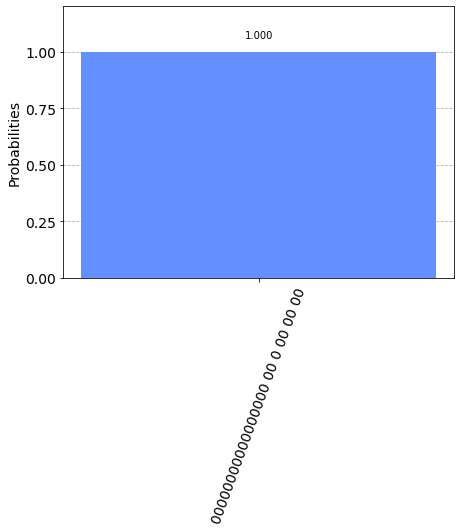

In [118]:
qc.measure_all()
aer_sim = Aer.get_backend('qasm_simulator')
qobj = assemble(qc)
counts = aer_sim.run(qobj).result().get_counts()
print(list(counts.keys())[0][14:17])
print(list(counts.keys())[0][9:12])
print(list(counts.keys())[0][4:7])
plot_histogram(counts)

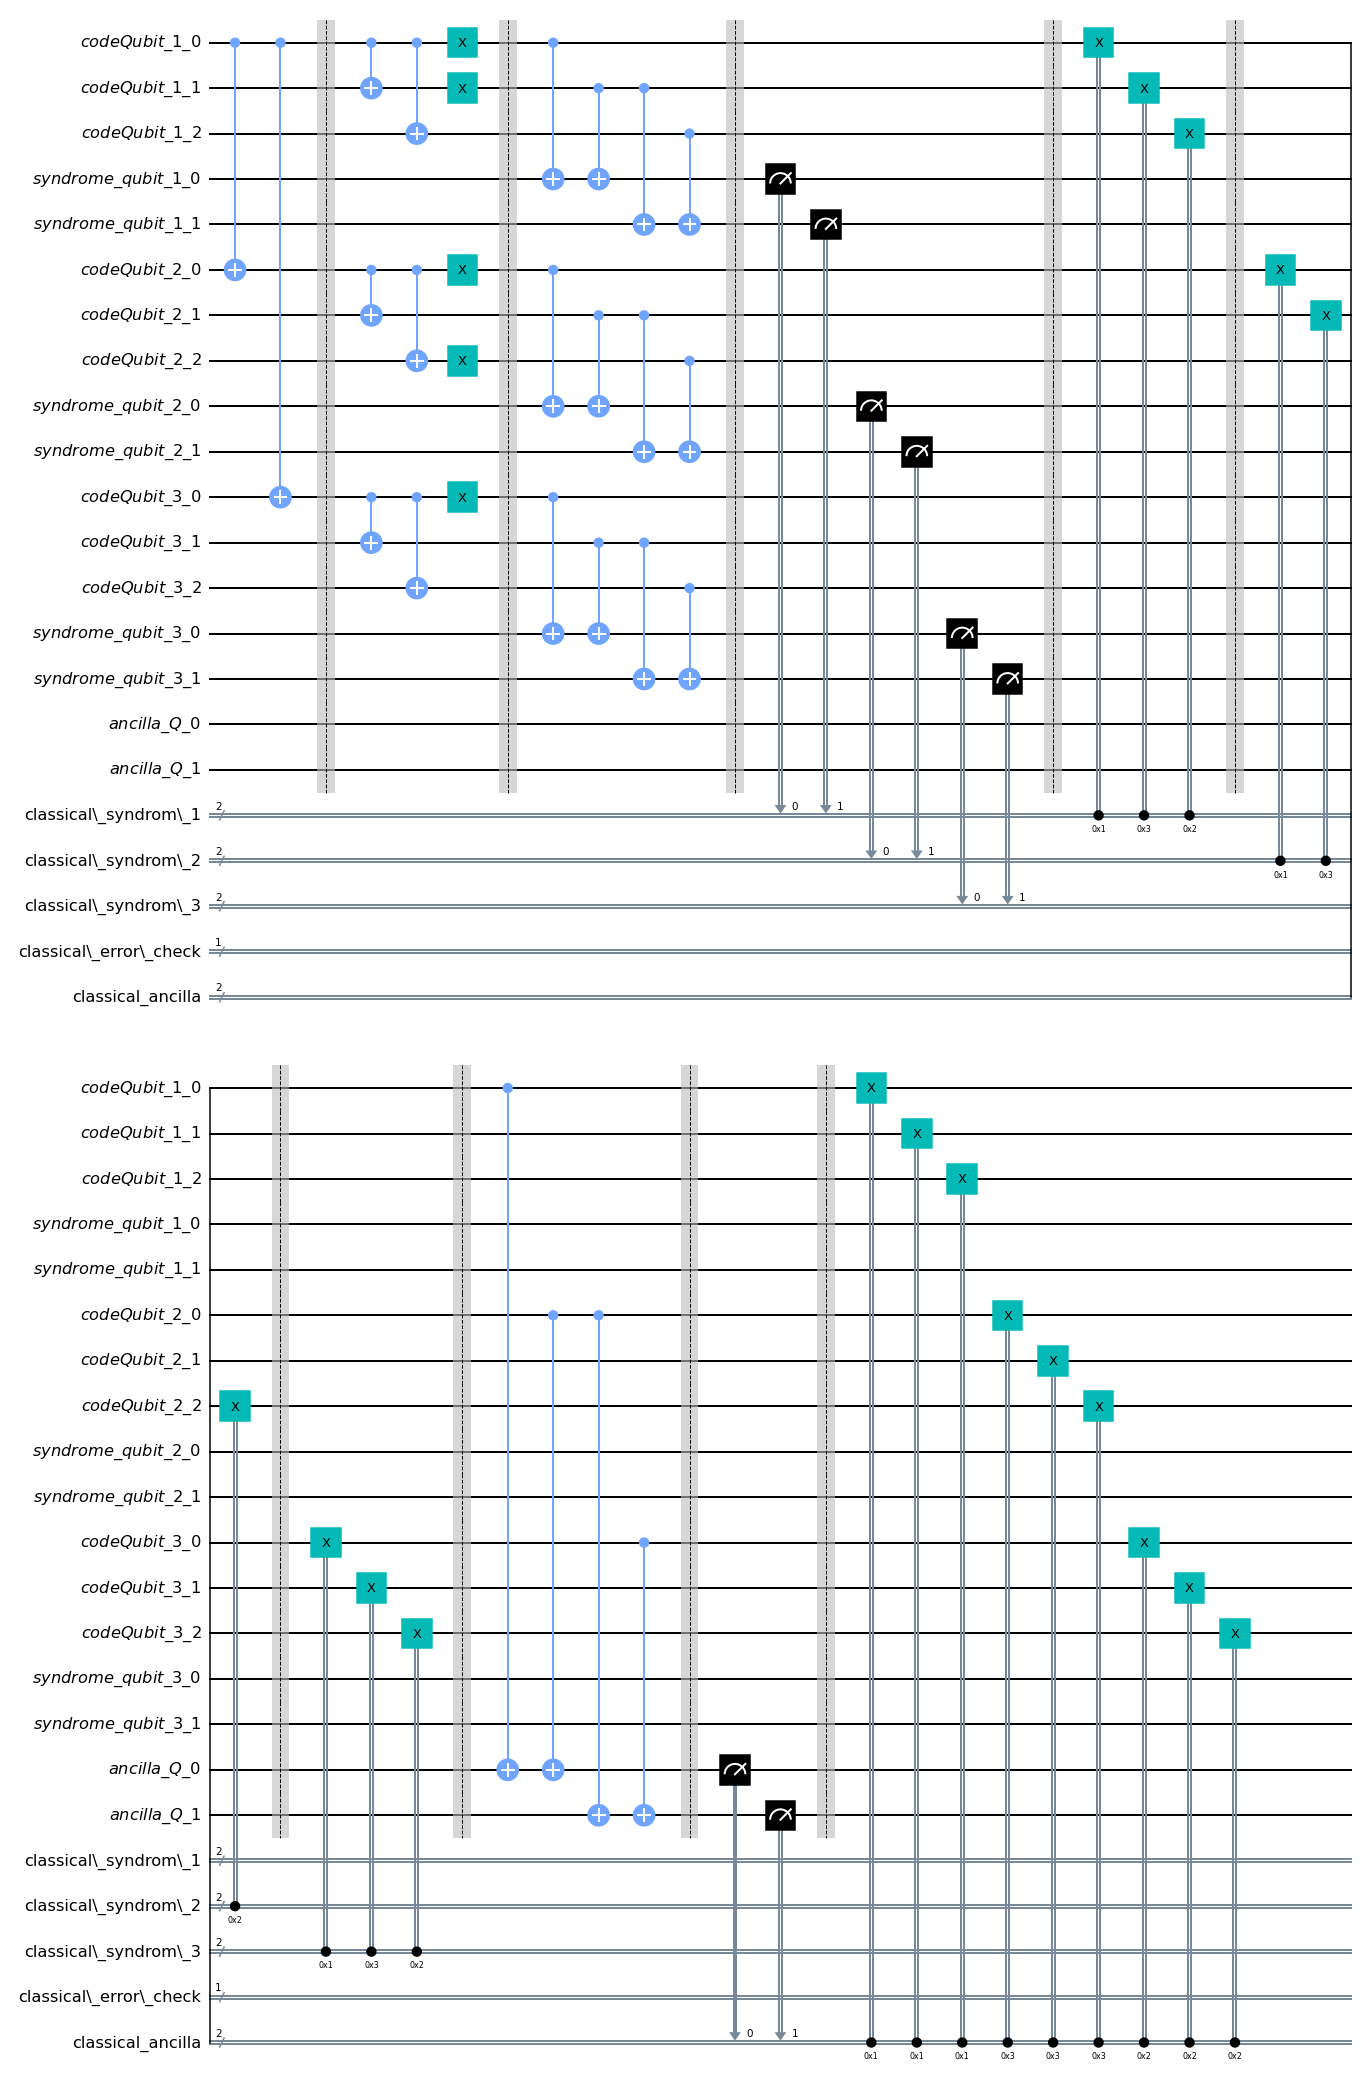

In [145]:
cq_1 = QuantumRegister(3, 'codeQubit_1')
cq_2 = QuantumRegister(3, 'codeQubit_2')
cq_3 = QuantumRegister(3, 'codeQubit_3')


lq_1 = QuantumRegister(2,'syndrome_qubit_1')
lq_2 = QuantumRegister(2,'syndrome_qubit_2')
lq_3 = QuantumRegister(2,'syndrome_qubit_3')

aq = QuantumRegister(2,'ancilla_Q')

c_1 = ClassicalRegister(2, 'classical_syndrom_1')
c_2 = ClassicalRegister(2, 'classical_syndrom_2')
c_3 = ClassicalRegister(2, 'classical_syndrom_3')


ca = ClassicalRegister(2, 'classical_ancilla')


c = ClassicalRegister(1, 'classical_error_check')

qc = QuantumCircuit(cq_1,lq_1,cq_2,lq_2,cq_3,lq_3,c_1,c_2,c_3,c,aq,ca)


#Encoding Super block
qc.cx(cq_1[0],cq_2[0])
qc.cx(cq_1[0],cq_3[0])

qc.barrier()

#Encoding small block 
qc.cx(cq_1[0],cq_1[1])
qc.cx(cq_1[0],cq_1[2])
qc.x(cq_1[0])
qc.x(cq_1[1])




qc.cx(cq_2[0],cq_2[1])
qc.cx(cq_2[0],cq_2[2])
qc.x(cq_2[0])
qc.x(cq_2[2])



qc.cx(cq_3[0],cq_3[1])
qc.cx(cq_3[0],cq_3[2])
qc.x(cq_3[0])


qc.barrier()

#Syndrom Error bits
qc.cx(cq_1[0],lq_1[0])
qc.cx(cq_1[1],lq_1[0])
qc.cx(cq_1[1],lq_1[1])
qc.cx(cq_1[2],lq_1[1])


qc.cx(cq_2[0],lq_2[0])
qc.cx(cq_2[1],lq_2[0])
qc.cx(cq_2[1],lq_2[1])
qc.cx(cq_2[2],lq_2[1])


qc.cx(cq_3[0],lq_3[0])
qc.cx(cq_3[1],lq_3[0])
qc.cx(cq_3[1],lq_3[1])
qc.cx(cq_3[2],lq_3[1])

qc.barrier()

#Measure 
qc.measure(lq_1,c_1)
qc.measure(lq_2,c_2)
qc.measure(lq_3,c_3)

qc.barrier()

#Recovery majority rule 
qc.x(cq_1[0]).c_if(c_1, 1)
qc.x(cq_1[1]).c_if(c_1, 3)
qc.x(cq_1[2]).c_if(c_1, 2)
qc.barrier()

qc.x(cq_2[0]).c_if(c_2, 1)
qc.x(cq_2[1]).c_if(c_2, 3)
qc.x(cq_2[2]).c_if(c_2, 2)
qc.barrier()

qc.x(cq_3[0]).c_if(c_3, 1)
qc.x(cq_3[1]).c_if(c_3, 3)
qc.x(cq_3[2]).c_if(c_3, 2)

qc.barrier()

#Error correction 
qc.cx(cq_1[0],aq[0])
qc.cx(cq_2[0],aq[0])
qc.cx(cq_2[0],aq[1])
qc.cx(cq_3[0],aq[1])
qc.barrier()

qc.measure(aq,ca)

qc.barrier()

qc.x(cq_1[0]).c_if(ca, 1)
qc.x(cq_1[1]).c_if(ca, 1)
qc.x(cq_1[2]).c_if(ca, 1)

qc.x(cq_2[0]).c_if(ca, 3)
qc.x(cq_2[1]).c_if(ca, 3)
qc.x(cq_2[2]).c_if(ca, 3)

qc.x(cq_3[0]).c_if(ca, 2)
qc.x(cq_3[1]).c_if(ca, 2)
qc.x(cq_3[2]).c_if(ca, 2)

#Circuit output 
qc.draw(output='mpl')


111
111
111


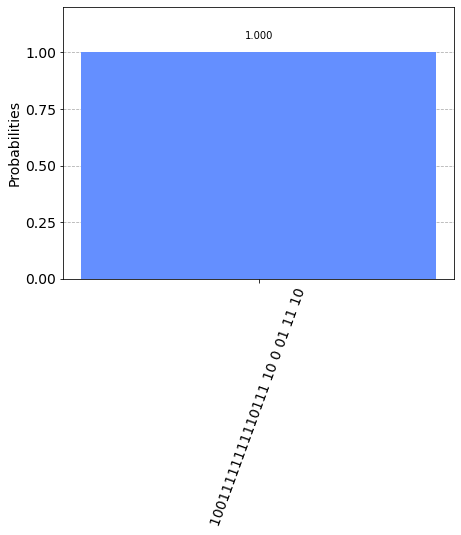

In [146]:
qc.measure_all()
aer_sim = Aer.get_backend('qasm_simulator')
qobj = assemble(qc)
counts = aer_sim.run(qobj).result().get_counts()
print(list(counts.keys())[0][14:17])
print(list(counts.keys())[0][9:12])
print(list(counts.keys())[0][4:7])
plot_histogram(counts)

In [113]:
def get_noise(p_meas,p_gate):
    error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
    error_gate1 = depolarizing_error(p_gate, 1)
    error_gate2 = error_gate1.tensor(error_gate1)

    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure") # measurement error is applied to measurement
        
    return noise_model

101
010
001
--------------------------
100
001
000
--------------------------
001
101
101
--------------------------
101
001
110
--------------------------
001
010
000
--------------------------
001
001
010
--------------------------
111
100
011
--------------------------
100
000
000
--------------------------
110
010
100
--------------------------
110
101
100
--------------------------
010
000
011
--------------------------
000
100
011
--------------------------
001
110
010
--------------------------
011
111
110
--------------------------
010
010
111
--------------------------
011
101
000
--------------------------
001
101
011
--------------------------
100
010
110
--------------------------
100
011
110
--------------------------
011
110
101
--------------------------
010
111
110
--------------------------
111
100
100
--------------------------
010
101
100
--------------------------
010
000
101
--------------------------
000
001
000
--------------------------
000
010
100
-------------

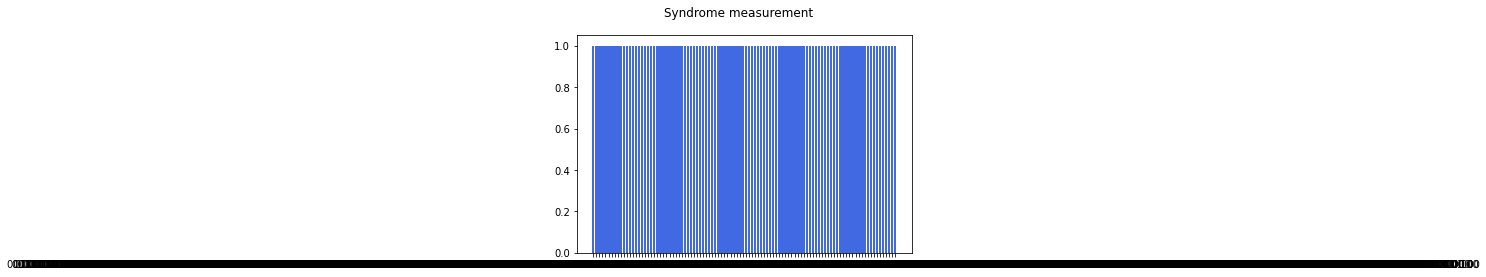

In [127]:
noise_model = get_noise(0.1,0)
qc.measure_all()
aer_sim = Aer.get_backend('qasm_simulator')
qobj = assemble(qc)
counts = aer_sim.run(qobj,noise_model=noise_model,shots=100).result().get_counts()
for i in range(len(counts.keys())):
    print(list(counts.keys())[i][14:17])
    print(list(counts.keys())[i][9:12])
    print(list(counts.keys())[i][4:7])
    print("--------------------------")

plt.suptitle("Syndrome measurement")
plt.bar(counts.keys(), counts.values(), color='royalblue')
plt.show()